# MBTI Data Storytelling 
The main goal of this analysis is to look for distinctions between mbti categories using regular data visualization before beginning vectorization of the data for bag of words analysis. Exploring the dataset with some visualization might give us some ideas of avenues to explore for further analysis before initiating further natural language processing. 

### 1. Import necessary libraries and load/preview data set
There was a weird error with the encoding, resulting in an odd extra column

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read in mbti_cleaned.csv and drop 'Unnamed: 0' column
df = pd.read_csv('mbti_cleaned.csv', encoding = "ISO-8859-1")
df = df.drop('Unnamed: 0', axis=1)
df.head()

,type,posts,clean_posts
0,INFJ,enfp and intj moments https://www.youtube.com...,enfp intj moments sportscenter top ten plays p...
1,INFJ,What has been the most life-changing experienc...,lifechanging experience life
2,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,repeat today
3,INFJ,May the PerC Experience immerse you.,may perc experience immerse
4,INFJ,The last thing my INFJ friend posted on his fa...,last thing infj friend posted facebook committ...


For a more in-depth look, call ```df.info()```

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409165 entries, 0 to 409164
Data columns (total 3 columns):
type           409165 non-null object
posts          409163 non-null object
clean_posts    408002 non-null object
dtypes: object(3)
memory usage: 9.4+ MB


Looks like there are some null entires that were missed by the initial cleaning. They'll mess up the a lot of ```numpy``` vectorized functions so remove them.

In [4]:
#select only entries with no null values
df = df[pd.notnull(df['clean_posts'])]
df = df[pd.notnull(df['posts'])]

### 2. Data Distribution
count the number of entries per mbti personality type.

Populating the interactive namespace from numpy and matplotlib


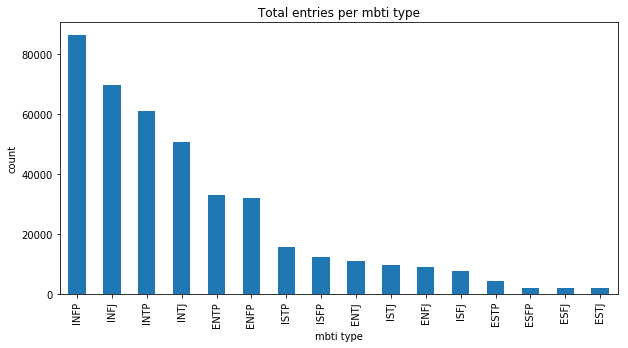

In [5]:
#set figure size
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 5)

#plot count of each entry by mbti category
df.type.value_counts().plot.bar(x='type')
plt.title("Total entries per mbti type")
plt.xlabel('mbti type')
plt.ylabel('count')
plt.show()

A distinct bias in the amount of data collected per personality type is apparent. This is likely to skew our analysis, so correlation to count of entries per personality type should be observed alongside any visualizations to ensure no apparent differences are due to this bias.

### 3. Are there differences in mean word count per mbti type?
checking mean word count per entry grouped by mbti category might show distinct differences in lengths of comments by personality type. First add new columns with word counts for every entry (both cleaned and uncleaned, to check their distributions respectively).

In [6]:
#using lambda functions, create new columns with counts of cleand and uncleaned entries 
df['words_per_comment_unclean'] = df['posts'].apply(lambda x: len(x.split()))
df['words_per_comment_clean'] = df['clean_posts'].apply(lambda x: len(x.split()))

Now plot the results

Populating the interactive namespace from numpy and matplotlib


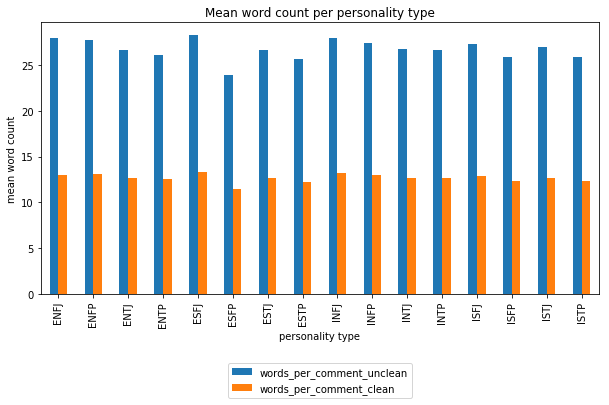

In [7]:
#graph mean word count per personality type
df.groupby(['type']).mean().plot(kind='bar', legend=True)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4))
plt.title('Mean word count per personality type')
plt.xlabel('personality type')
plt.ylabel('mean word count')
plt.show()

There is very little difference per category. Any pronounced differences become muted after the entries are cleaned for vectorization, meaning there is no distinct difference in mean word count per mbti category. Checking the relationship between the distribution of the mean word counts and category entry counts may show if mean is affected by bias in the category representation.

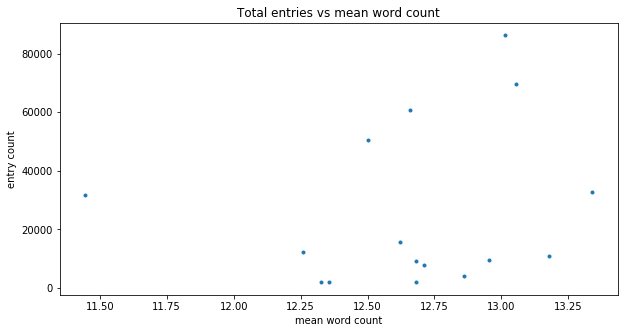

In [20]:
#create x, y pairs for mean word count per category and entries count
x_mean = df_cleaned.groupby(['type']).mean()
y_counts = df_cleaned.type.value_counts()

#graph
plt.plot(x_mean, y_counts, marker='.', linestyle='none')
plt.title('Total entries vs mean word count')
plt.xlabel('mean word count')
plt.ylabel('entry count')
plt.show()

There looks like there is a very weak relationship between the two in only a few categories while the rest are distinctly distributed (to a certain degree, the range of the distribution is quite small and the distinction not very practical). Looking at this chart, it would appear there is a very small relationship between representation and mean word count of mbti category, and that if there is a relationship it only comes into play after passing a certain threshold (in this case somewhere around 40,000).

### 4. Are there differences in distribution in the word counts per personality category?
Variance gives us a better idea of the distribution of the word count per mbti category. Perhaps there is distint differnce in variance that can help seperate category types where mean could not. I've selected variance because it is more sensitive to chances than standard deviation, since the differences so far in the data have been quite subtle.

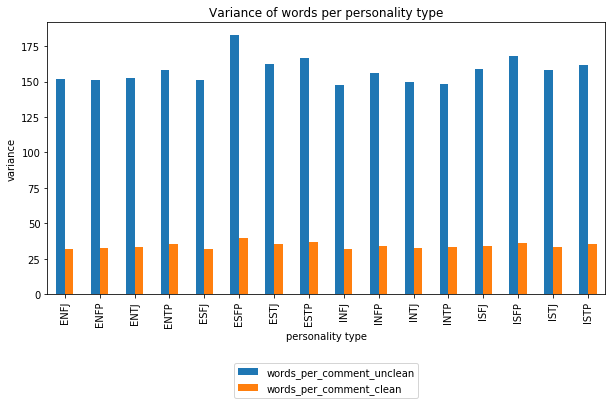

In [8]:
#graph variance of words per personality type
df.groupby(['type']).var().plot(kind='bar', legend=True)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4))
plt.title('Variance of words per personality type')
plt.xlabel('personality type')
plt.ylabel('variance')
plt.show()

Again we see that while there is some variation between categories, it isn't anything conclusive. Since the uncleaned posts are muting the cleaned posts variance, it might be more helpful to plot the cleaned posts seperately and overlay it with the distribution of the mbti entry counts per category. Since some mbti categorys are more expressed than others, we would expect to see a relationship between variance and number of entries.

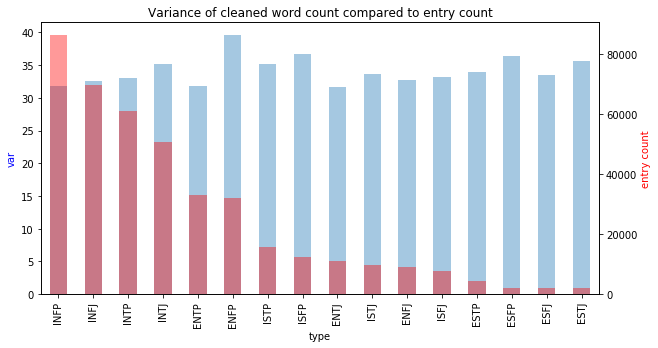

Populating the interactive namespace from numpy and matplotlib


In [9]:
#create a dataframe of only the necessary columns
df_cleaned = df.loc[:,['type', 'words_per_comment_clean']]

#this is to overlay two plots
fig, ax = plt.subplots()

#graph the variance of cleaned posts word count
df_cleaned.groupby(['type']).var().plot(kind='bar', ax=ax, alpha=0.4, legend=False)
ax.set_ylabel('var', color='b')

#this is to overlay two plots
ax2 = ax.twinx()

#graph the entry counts per mbti category
df_cleaned.type.value_counts().plot.bar(x='type', ax=ax2, color='red', alpha=0.4, legend=False)
ax2.set_ylabel('entry count', color='r')

#title and display graph
plt.title('Variance of cleaned word count compared to entry count')
plt.show()

While pretty, this graph doesn't really display any relationship very well. A scatter plot will show the relationship better. This is not a true correlation plot because the array sizes are different, but it will demonstrate any relationship between word count and total representation.

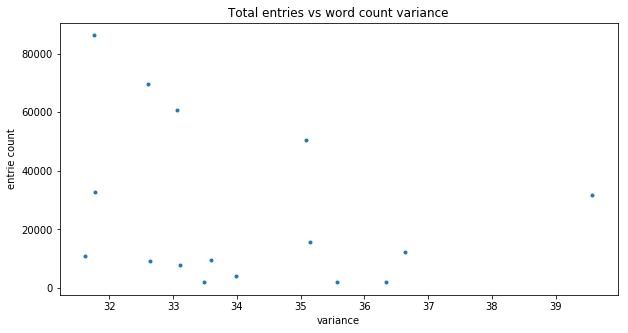

In [19]:
#create x, y pairs for word count variance and entries count
x_var = df_cleaned.groupby(['type']).var()
y_counts = df_cleaned.type.value_counts()

#plot data
plt.plot(x_var, y_counts, marker='.', linestyle='none')
plt.title('Total entries vs word count variance')
plt.xlabel('variance')
plt.ylabel('entry count')
plt.show()

It looks like there is a very weak negative correlation between mbti entry count and variance in only a few categories, indicating that they might not be related. Interestingly enough, there does seem to be many categories that have distinct variances despite their over or under representation. 

### 5. Extracting text character distributions.
If you recall, looking at the original data there were many http links within the entries. Is it possibly that http links might be more represented in certain categories? How about for questions marks and exclamation points?

In [12]:
#create seperate columns with counts of 'http', '?', and '!'.
df['http_per_comment'] = df['posts'].apply(lambda x: x.count('http'))
df['qm_per_comment'] = df['posts'].apply(lambda x: x.count('?'))
df['ex_per_comment'] = df['posts'].apply(lambda x: x.count('!'))

First check for counts of 'http' per entry grouped by personality type.

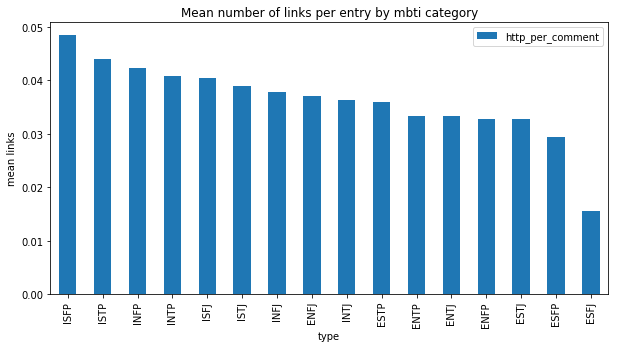

In [27]:
#select out the 'type' and 'http_per_comment' columns
df_http = df.loc[:,['type', 'http_per_comment']]

#plot 'http_per_comment' grouped by 'type' 
df_http.groupby(['type']).mean().sort_values(by=['http_per_comment'], ascending=False).plot(kind='bar')
plt.title('Mean number of links per entry by mbti category')
plt.ylabel('mean links')
plt.show()

The mean number of http links per personality type looks to be distinct in nature, although barely. Could this difference be caused by the mbti type representation bias? Check by plotting the relationship between mean number of http links per mbti category and total count of category entries. 

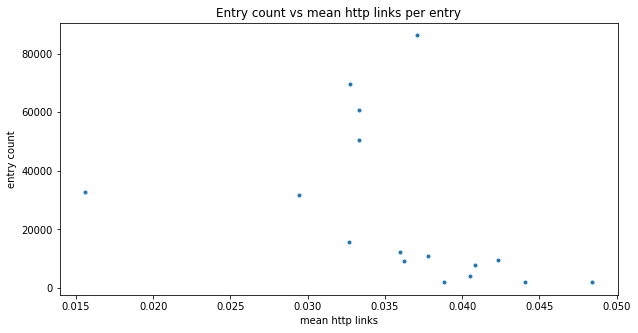

In [25]:
#define x, y values
x_http = df_http.groupby(['type']).mean()
y_counts = df_http.type.value_counts()

#show plot
plt.plot(x_http, y_counts, marker='.', linestyle='none')
plt.title('Entry count vs mean http links per entry')
plt.xlabel('mean http links')
plt.ylabel('entry count')
plt.show()

This looks promising! According to this chart, there is little relationship between category representation within the data set and mean http links per entry grouped by mbti category. This might point to a difference in mbti category distinguished by running mean number of http links, although the range is absolutely minute.

Next check the mean number of question marks per entry grouped by mbti category. Perhaps one mbti category asks more questions?

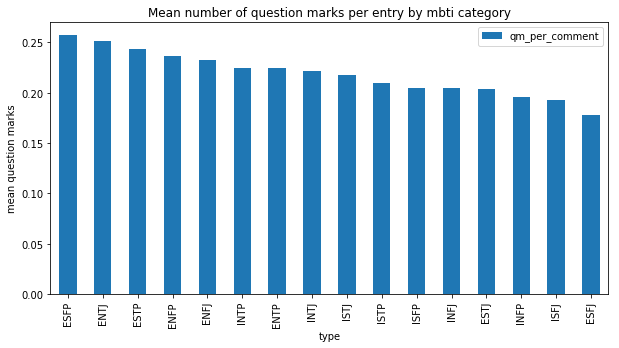

In [29]:
#select out the 'type' and 'qm_per_comment' columns
df_qm = df.loc[:,['type', 'qm_per_comment']]

#display graph
df_qm.groupby(['type']).mean().sort_values(by=['qm_per_comment'], ascending=False).plot(kind='bar')
plt.title('Mean number of question marks per entry by mbti category')
plt.ylabel('mean question marks')
plt.show()

Interesting, this looks similar to the last bar chart, in that the categories seem to be more or less distinct in their mean number of question marks. Again, affects from bias must be taken into account first before drawing conclusions.

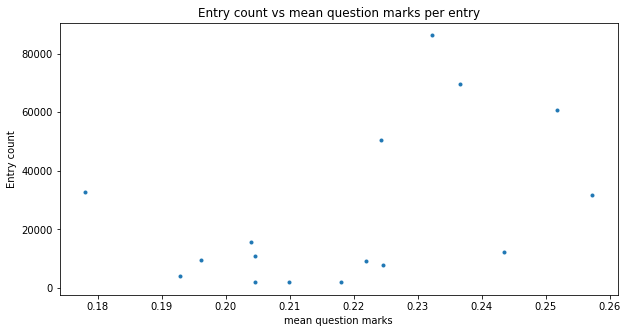

In [32]:
#define x, y values 
x_qm = df_qm.groupby(['type']).mean()
y_counts = df_qm.type.value_counts()

#plot data
plt.plot(x_qm, y_counts, marker='.', linestyle='none')
plt.title('Entry count vs mean question marks per entry')
plt.xlabel('mean question marks')
plt.ylabel('Entry count')
plt.show()

Here can be seen a bit of a stronger relationship between total entries and mean number of question marks per entry. It seems the distribution might have been more dude to more questions being represented by the biased number of entries for certain categories, rather than certain categories inherently asking more questions. Based on this information, mean number of question marks doesn't likely serve as an unbiased way of distiguishing personality type.

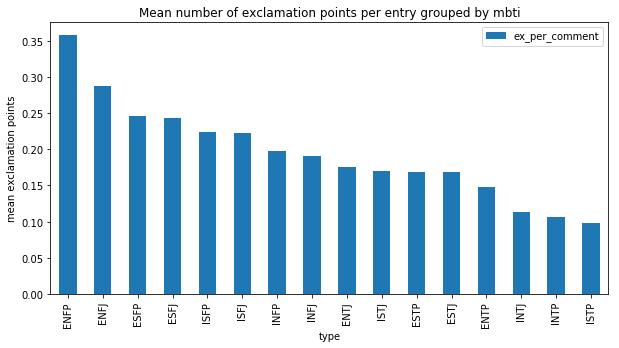

In [34]:
#select out 'type' and 'ex_per_comment' columns
df_ex = df.loc[:,['type', 'ex_per_comment']]

#plot mean number of exclamation points per entry grouped by 'type'
df_ex.groupby(['type']).mean().sort_values(by=['ex_per_comment'], ascending=False).plot(kind='bar')
plt.title('Mean number of exclamation points per entry grouped by mbti')
plt.ylabel('mean exclamation points')
plt.show()

Of all three comparisons, this chart has the largest range of mean exclamation points per mbti category. If this distinction is independent of representation bias, it might be useful; however, affects from bias must be taken into account first before drawing conclusions.

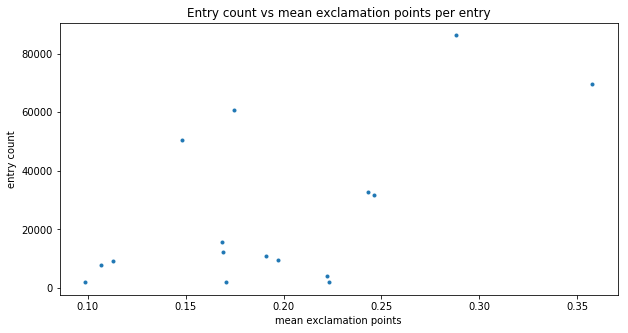

In [35]:
#define x, y values 
x_ex = df_ex.groupby(['type']).mean()
y_ex = df_ex.type.value_counts()

#display plot
plt.plot(x_ex, y_ex, marker='.', linestyle='none')
plt.title('Entry count vs mean exclamation points per entry')
plt.xlabel('mean exclamation points')
plt.ylabel('entry count')
plt.show()

Alas, it would seem that this comparison had the greatest relationship between mean exlamation points per entry and mbti representation bias. This means that any difference in distribution of mean exclamation marks per category is likely just due to more entries, and not any paticular difference in rate of exclamation mark usage per mbti category. 

### 6. Conclusion
Of the visualization analysis conducted here, the most interesting was "Mean http links per entry grouped by mbti" (a text feature extration), with the follow-ups being "variance of word count per mbti" and "mean of word count per mbti." The first analysis showed some distict, although small, difference in http link inclusion in entrys per mbti category. The differences in mean word count and variance of word count per mbti category were also marginally distinct between mbti category, although likely affected by bias in category representation after their total entries begain to exceed 40,000.